# 使用 MMEditing 进行图像超分辨率

MMEditing 包含图像编辑的若干子任务，在本教程中，我们将学习使用 MMEditing 完成图像超分辨率的任务。

## 安装 MMEditing

In [ ]:
# 检查 PyTorch 版本
!pip list | grep torch

torch                         1.8.1+cu101   
torchsummary                  1.5.1         
torchtext                     0.9.1         
torchvision                   0.9.1+cu101   


In [ ]:
# 安装对应版本的 mmcv-full
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu101/torch1.8.0/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/cu101/torch1.8.0/index.html
     |████████████████████████████████| 30.2MB 98kB/s 
     |████████████████████████████████| 194kB 8.4MB/s 


In [ ]:
# 源码安装 MMEditing
%cd /content
!rm -rf mmediting
!git clone https://github.com/open-mmlab/mmediting.git

%cd mmediting
!pip install -e .

/content
Cloning into 'mmediting'...
remote: Enumerating objects: 6485, done.
remote: Counting objects: 100% (690/690), done.
remote: Compressing objects: 100% (391/391), done.
remote: Total 6485 (delta 382), reused 505 (delta 288), pack-reused 5795
Receiving objects: 100% (6485/6485), 4.74 MiB | 16.55 MiB/s, done.
Resolving deltas: 100% (4381/4381), done.
/content/mmediting
Obtaining file:///content/mmediting
  Running setup.py develop for mmedit


In [ ]:
# 检查PyTorchCheck Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMEditing installation
import mmedit
print(mmedit.__version__)

1.8.1+cu101 True
0.7.0


## 使用预训练模型完成推理


### 查找并下载预训练模型

https://mmediting.readthedocs.io/en/latest/

In [ ]:
# 下载 SRCNN 的预训练模型
!test -d checkpoint || mkdir checkpoint
!wget -c https://openmmlab.oss-accelerate.aliyuncs.com/mmediting/restorers/srcnn/srcnn_x4k915_1x16_1000k_div2k_20200608-4186f232.pth \
      -O ./checkpoint/srcnn_x4k915_1x16_1000k_div2k_20200608-4186f232.pth
# 下载 ESRGAN 的预训练模型
# !wget -c https://download.openmmlab.com/mmediting/restorers/esrgan/esrgan_x4c64b23g32_1x16_400k_div2k_20200508-f8ccaf3b.pth \
#       -O ./checkpoint/esrgan_x4c64b23g32_1x16_400k_div2k_20200508-f8ccaf3b.pth    

# 下载样例数据
!rm -rf data
!git clone https://github.com/kckchan-dev/Datasets.git data

--2021-05-19 21:00:11--  https://openmmlab.oss-accelerate.aliyuncs.com/mmediting/restorers/srcnn/srcnn_x4k915_1x16_1000k_div2k_20200608-4186f232.pth
Resolving openmmlab.oss-accelerate.aliyuncs.com (openmmlab.oss-accelerate.aliyuncs.com)... 47.88.36.78
Connecting to openmmlab.oss-accelerate.aliyuncs.com (openmmlab.oss-accelerate.aliyuncs.com)|47.88.36.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85911 (84K) [application/octet-stream]
Saving to: ‘./checkpoint/srcnn_x4k915_1x16_1000k_div2k_20200608-4186f232.pth’

./checkpoint/srcnn_ 100%[===================>]  83.90K  --.-KB/s    in 0.04s   

2021-05-19 21:00:12 (1.87 MB/s) - ‘./checkpoint/srcnn_x4k915_1x16_1000k_div2k_20200608-4186f232.pth’ saved [85911/85911]

Cloning into 'data'...
remote: Enumerating objects: 225, done.
remote: Counting objects: 100% (225/225), done.
remote: Compressing objects: 100% (222/222), done.
remote: Total 225 (delta 5), reused 217 (delta 0), pack-reused 0
Receiving objects: 100

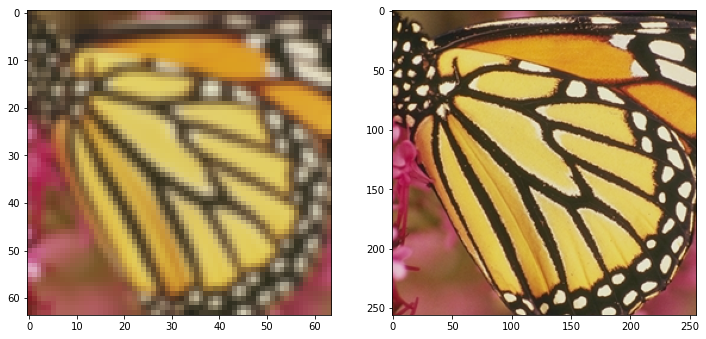

In [ ]:
import matplotlib.pyplot as plt
import mmcv

img_LR = mmcv.imread('./data/Set5/LR/butterfly.png', channel_order='rgb')
img_HR = mmcv.imread('./data/Set5/GT/butterfly.png', channel_order='rgb')

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(img_LR)
plt.subplot(1,2,2)
plt.imshow(img_HR)
plt.show()

In [ ]:
config_file = 'configs/restorers/srcnn/srcnn_x4k915_g1_1000k_div2k.py'
checkpoint_file = 'checkpoint/srcnn_x4k915_1x16_1000k_div2k_20200608-4186f232.pth'

# config_file = 'configs/restorers/esrgan/esrgan_x4c64b23g32_g1_400k_div2k.py'
# checkpoint_file = 'checkpoint/esrgan_x4c64b23g32_1x16_400k_div2k_20200508-f8ccaf3b.pth'

### 调用 API 构建模型

In [ ]:
from mmedit.apis import init_model

model = init_model(config_file, checkpoint_file, device='cuda:0')

Use load_from_local loader


In [ ]:
model

BasicRestorer(
  (generator): SRCNN(
    (img_upsampler): Upsample(scale_factor=4.0, mode=bicubic)
    (conv1): Conv2d(3, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
    (conv2): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
    (conv3): Conv2d(32, 3, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (relu): ReLU()
  )
  (pixel_loss): L1Loss()
)

### 调用 API 进行推理

In [ ]:
from mmedit.apis import restoration_inference

result = restoration_inference(model, 'data/Set5/LR/butterfly.png')

In [ ]:
result

tensor([[[[0.2683, 0.2920, 0.3077,  ..., 0.2771, 0.2675, 0.2619],
          [0.2803, 0.2900, 0.3075,  ..., 0.2698, 0.2723, 0.2657],
          [0.2757, 0.2884, 0.2977,  ..., 0.2390, 0.2436, 0.2414],
          ...,
          [0.4242, 0.4442, 0.4692,  ..., 0.6040, 0.5987, 0.5821],
          [0.4034, 0.4327, 0.4643,  ..., 0.6063, 0.6019, 0.5739],
          [0.3646, 0.4194, 0.4550,  ..., 0.5951, 0.5936, 0.5781]],

         [[0.2153, 0.2219, 0.2387,  ..., 0.2224, 0.2158, 0.2173],
          [0.2162, 0.2233, 0.2377,  ..., 0.2112, 0.2158, 0.2145],
          [0.2099, 0.2265, 0.2283,  ..., 0.1897, 0.2001, 0.1939],
          ...,
          [0.1462, 0.1318, 0.1438,  ..., 0.3945, 0.3957, 0.3920],
          [0.1515, 0.1346, 0.1497,  ..., 0.3926, 0.3954, 0.3920],
          [0.1462, 0.1522, 0.1601,  ..., 0.3904, 0.3950, 0.4083]],

         [[0.1602, 0.1553, 0.1649,  ..., 0.1992, 0.1932, 0.1998],
          [0.1617, 0.1622, 0.1633,  ..., 0.1966, 0.1983, 0.1968],
          [0.1602, 0.1605, 0.1562,  ..., 0

In [ ]:
result = torch.clamp(result, 0, 1)
img_SR = result.squeeze(0).permute(1, 2, 0).numpy()

### 分析图像恢复效果

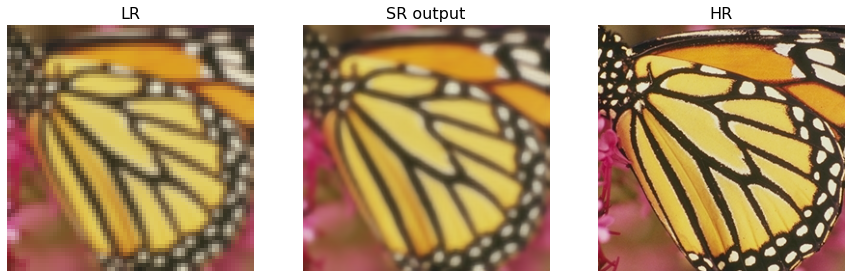

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(1, 3, 1)
plt.title('LR', fontsize=16)
ax1.axis('off')
ax2 = fig.add_subplot(1, 3, 2)
plt.title('SR output', fontsize=16)
ax2.axis('off')
ax3 = fig.add_subplot(1, 3, 3)
plt.title('HR', fontsize=16)
ax3.axis('off')
ax1.imshow(img_LR)
ax2.imshow(img_SR)
ax3.imshow(img_HR)
plt.show()

从结果可以看到，输出仍然有些模糊。事实上这个是正常现象。

我们使用的数据在降采样前有高斯模糊滤波，但预训练模型在训练时所使用的数据没有加入高斯模糊，训练与测试数据的失配产生了上述问题。

为了让模型也恢复高斯模糊，我们需要使用加入模糊的图像对模型进行微调。

## 使用自定义的数据集微调模型

使用 MMEditing 完成模型微调，我们需要三个步骤：

1. 准备训练数据
1. 修改配置文件
1. 启动训练


### 准备训练数据

使用 MMEditing 训练超分辨率模型，我们需要将数据整理成如下格式：

1. 将高分辨率图像和低分辨率图像放置在不同的文件夹中，对应的高低分图像使用相同的文件名。
1. 生成一个标注文件（annotation file），是一个文件列表，每行包含高分图像文件名，以及对应的高分图像的分辨率。例：

```
0001_s001.png (480,480,3)
0001_s002.png (480,480,3)
...
```

在这里我们使用 DIV2K 数据集的一个小子集，并在生成低分图像时，使用高斯滤波（样例数据中已经处理好）。

In [ ]:
# 生成图像列表
import glob
gt_paths = sorted(glob.glob('./data/DIV2K/GT/*.png'))
with open('data/training_ann.txt', 'w') as f:
  for gt_path in gt_paths:
    filename = gt_path.split('/')[-1]
    line = f'{filename} (480,480,3)\n'
    f.write(line)

### 对应修改配置文件

In [ ]:
# 加载原始SRCNN的配置文件

from mmcv import Config

cfg = Config.fromfile('configs/restorers/srcnn/srcnn_x4k915_g1_1000k_div2k.py')

print(f'Config:\n{cfg.pretty_text}')

Config:
exp_name = 'srcnn_x4k915_g1_1000k_div2k'
scale = 4
model = dict(
    type='BasicRestorer',
    generator=dict(
        type='SRCNN',
        channels=(3, 64, 32, 3),
        kernel_sizes=(9, 1, 5),
        upscale_factor=4),
    pixel_loss=dict(type='L1Loss', loss_weight=1.0, reduction='mean'))
train_cfg = None
test_cfg = dict(metrics=['PSNR', 'SSIM'], crop_border=4)
train_dataset_type = 'SRAnnotationDataset'
val_dataset_type = 'SRFolderDataset'
train_pipeline = [
    dict(
        type='LoadImageFromFile',
        io_backend='disk',
        key='lq',
        flag='unchanged'),
    dict(
        type='LoadImageFromFile',
        io_backend='disk',
        key='gt',
        flag='unchanged'),
    dict(type='RescaleToZeroOne', keys=['lq', 'gt']),
    dict(
        type='Normalize',
        keys=['lq', 'gt'],
        mean=[0, 0, 0],
        std=[1, 1, 1],
        to_rgb=True),
    dict(type='PairedRandomCrop', gt_patch_size=128),
    dict(
        type='Flip', keys=['lq', 'gt'], f

原始配置文件基于完整的 DIV2K 数据集训练，我们需要做出对应修改。

In [ ]:
from mmcv.runner import set_random_seed

# 指定训练集的目录和标注文件
cfg.data.train.dataset.lq_folder = './data/DIV2K/LR'
cfg.data.train.dataset.gt_folder = './data/DIV2K/GT'
cfg.data.train.dataset.ann_file = './data/training_ann.txt'

# 指定验证集的目录
cfg.data.val.lq_folder = './data/Set5/LR'
cfg.data.val.gt_folder = './data/Set5/GT'

# 指定测试机的目录
cfg.data.test.lq_folder = './data/Set5/LR'
cfg.data.test.gt_folder = './data/Set5/GT'

# 指定预训练模型
cfg.load_from = './checkpoint/srcnn_x4k915_1x16_1000k_div2k_20200608-4186f232.pth'

# 设置工作目录
cfg.work_dir = './tutorial_exps/srcnn'

# 配置 batch size 
cfg.data.samples_per_gpu = 4
cfg.data.workers_per_gpu = 0
cfg.data.val_workers_per_gpu = 0

# 设置总迭代次数
cfg.total_iters = 200

# 在100次迭代时降低学习率
cfg.lr_config = {}
cfg.lr_config.policy = 'Step'
cfg.lr_config.by_epoch = False
cfg.lr_config.step = [100]
cfg.lr_config.gamma = 0.5


# 删除一个影响训练的项目
if cfg.evaluation.get('gpu_collect', None):
  cfg.evaluation.pop('gpu_collect')

# 在最后进行一次验证，并保存结果
cfg.evaluation.interval = 200
cfg.checkpoint_config.interval = 200

# 日志
cfg.log_config.interval = 40

# 随机种子
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpus = 1
print(f'Config:\n{cfg.pretty_text}')

Config:
exp_name = 'srcnn_x4k915_g1_1000k_div2k'
scale = 4
model = dict(
    type='BasicRestorer',
    generator=dict(
        type='SRCNN',
        channels=(3, 64, 32, 3),
        kernel_sizes=(9, 1, 5),
        upscale_factor=4),
    pixel_loss=dict(type='L1Loss', loss_weight=1.0, reduction='mean'))
train_cfg = None
test_cfg = dict(metrics=['PSNR', 'SSIM'], crop_border=4)
train_dataset_type = 'SRAnnotationDataset'
val_dataset_type = 'SRFolderDataset'
train_pipeline = [
    dict(
        type='LoadImageFromFile',
        io_backend='disk',
        key='lq',
        flag='unchanged'),
    dict(
        type='LoadImageFromFile',
        io_backend='disk',
        key='gt',
        flag='unchanged'),
    dict(type='RescaleToZeroOne', keys=['lq', 'gt']),
    dict(
        type='Normalize',
        keys=['lq', 'gt'],
        mean=[0, 0, 0],
        std=[1, 1, 1],
        to_rgb=True),
    dict(type='PairedRandomCrop', gt_patch_size=128),
    dict(
        type='Flip', keys=['lq', 'gt'], f

### 启动训练

调用对应的 Python API 启动训练

In [ ]:
import os.path as osp

from mmedit.datasets import build_dataset
from mmedit.models import build_model
from mmedit.apis import train_model
from mmcv.runner import init_dist

import mmcv
import os

# 构建数据集
datasets = [build_dataset(cfg.data.train)]

# 构建模型
model = build_model(cfg.model, train_cfg=cfg.train_cfg, test_cfg=cfg.test_cfg)

# 创建工作路径
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))

# 额外信息
meta = dict()
if cfg.get('exp_name', None) is None:
    cfg['exp_name'] = osp.splitext(osp.basename(cfg.work_dir))[0]
meta['exp_name'] = cfg.exp_name
meta['mmedit Version'] = mmedit.__version__
meta['seed'] = 0

# 启动训练
train_model(model, datasets, cfg, distributed=False, validate=True, meta=meta)

/content/mmediting/mmedit/apis/train.py:273: UserWarning: "val_samples_per_gpu/val_workers_per_gpu" have been deprecated. Please use "val_dataloader=dict(samples_per_gpu=1)" instead. Details see https://github.com/open-mmlab/mmediting/pull/201
  warnings.warn('"val_samples_per_gpu/val_workers_per_gpu" have '
2021-05-19 21:13:32,070 - mmedit - INFO - load checkpoint from ./checkpoint/srcnn_x4k915_1x16_1000k_div2k_20200608-4186f232.pth
2021-05-19 21:13:32,071 - mmedit - INFO - Use load_from_local loader
2021-05-19 21:13:32,074 - mmedit - INFO - Start running, host: root@cd3d9708e3f9, work_dir: /content/mmediting/tutorial_exps/srcnn
2021-05-19 21:13:32,075 - mmedit - INFO - workflow: [('train', 1)], max: 200 iters
2021-05-19 21:13:40,220 - mmedit - INFO - Iter [40/200]	lr_generator: 2.000e-04, eta: 0:00:32, time: 0.203, data_time: 0.178, memory: 588, loss_pix: 0.0397, loss: 0.0397
2021-05-19 21:13:48,333 - mmedit - INFO - Iter [80/200]	lr_generator: 2.000e-04, eta: 0:00:24, time: 0.203, d

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 5/5, 13.6 task/s, elapsed: 0s, ETA:     0s

2021-05-19 21:14:12,969 - mmedit - INFO - Saving checkpoint at 200 iterations
2021-05-19 21:14:12,975 - mmedit - INFO - Iter(val) [200]	PSNR: 26.1067, SSIM: 0.7256


PNSR 和 SSIM 是像素级别的评估标准，可以看到训练过程中，LOSS下降，两个指标增加，符合预期。

### 使用微调后的模型完成推理

微调模型存储在工作目录下，我们看一下微调后的模型的回复效果是否有所好转。

In [ ]:
from mmedit.apis import init_model
from mmedit.apis import restoration_inference

model = init_model(config_file, F'{cfg.work_dir}/latest.pth', device='cuda:0')
result = restoration_inference(model, 'data/Set5/LR/butterfly.png')

result = torch.clamp(result, 0, 1)
img_SR_ft = result.squeeze(0).permute(1, 2, 0).numpy()

Use load_from_local loader


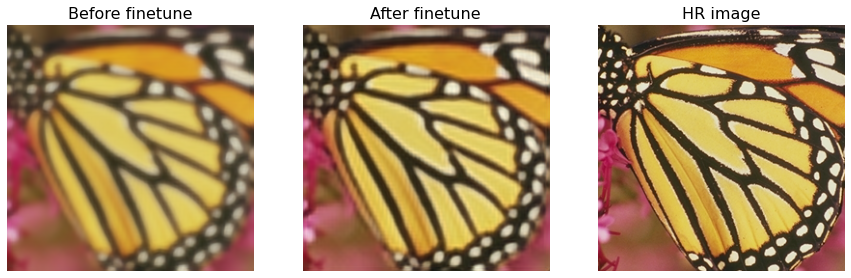

In [ ]:
# 比较Let's compare the result with the LR and HR images
fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(1, 3, 1)
plt.title('Before finetune', fontsize=16)
ax1.axis('off')
ax2 = fig.add_subplot(1, 3, 2)
plt.title('After finetune', fontsize=16)
ax2.axis('off')
ax3 = fig.add_subplot(1, 3, 3)
plt.title('HR image', fontsize=16)
ax3.axis('off')
ax1.imshow(img_SR)
ax2.imshow(img_SR_ft)
ax3.imshow(img_HR)
plt.show()